In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2019-01-04 20:11:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2019-01-04 20:11:48 (372 MB/s) - ‘drug200.csv’ saved [6027/6027]



In [3]:
df = pd.read_csv('drug200.csv')

In [4]:
df.head(11)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [7]:
Y = df['Drug']

In [8]:
from sklearn.model_selection import train_test_split as split

# Entropy

In [9]:
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)

In [10]:
le_sex = preprocessing.LabelEncoder()

In [11]:
le_sex.fit(['M','F'])

LabelEncoder()

In [12]:
X[:,1] = le_sex.transform(X[:,1])

In [13]:
le_BP = preprocessing.LabelEncoder()

In [14]:
le_BP.fit(['HIGH','NORMAL','LOW'])

LabelEncoder()

In [15]:
X[:,2] = le_BP.transform(X[:,2])

In [16]:
le_cholestrol = preprocessing.LabelEncoder()

In [17]:
le_cholestrol.fit(['NORMAL','HIGH'])

LabelEncoder()

In [18]:
X[:,3] = le_cholestrol.transform(X[:,3])

In [19]:
train_x,test_x,train_y,test_y = split(X,Y,test_size = 0.2)

In [20]:
tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
pred_entropy = tree.predict(test_x)

In [22]:
print(metrics.accuracy_score(test_y,pred_entropy))

1.0


In [23]:
ent = pd.DataFrame({'Actual: ':test_y,'Predicted: ':pred_entropy})

In [24]:
ent

,Actual:,Predicted:
67,drugX,drugX
21,drugY,drugY
194,drugY,drugY
57,drugY,drugY
18,drugC,drugC
16,drugX,drugX
187,drugA,drugA
158,drugC,drugC
72,drugX,drugX
121,drugY,drugY


In [25]:
from IPython.display import Image

In [26]:
from sklearn.tree import export_graphviz

In [27]:
from sklearn.externals.six import StringIO

In [28]:
dot_data = StringIO()

In [29]:
export_graphviz(tree,out_file = dot_data,filled = True,rounded = True,special_characters = True)

In [30]:
import pydotplus

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [32]:
img = Image(graph.create_png())

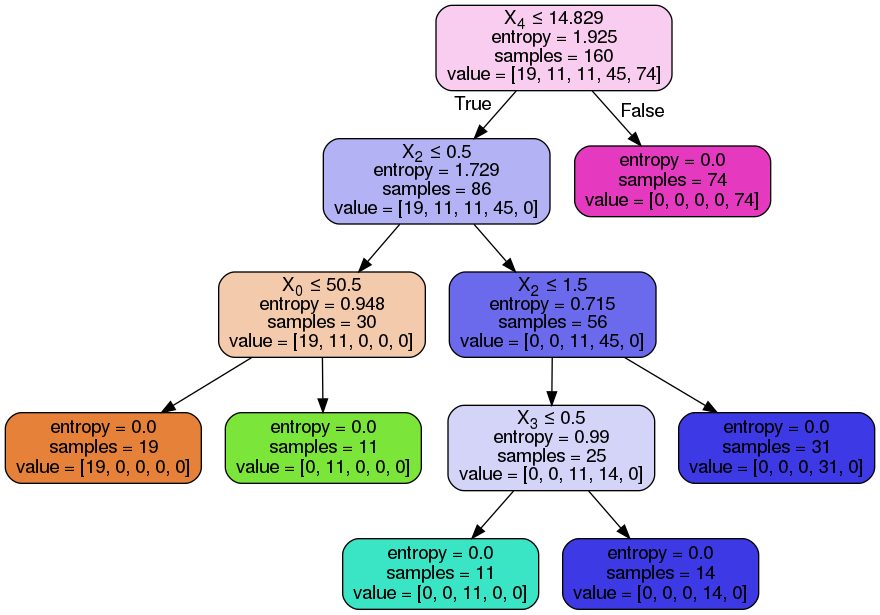

In [33]:
img

# Gini

In [34]:
tree2 = DecisionTreeClassifier(criterion = 'gini',max_depth = 4)

In [35]:
tree2.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
pred_gini = tree2.predict(test_x)

In [37]:
print(metrics.accuracy_score(test_y,pred_gini))

1.0


In [38]:
pd.DataFrame({'Actual':test_y,'Predicted':pred_gini})

,Actual,Predicted
67,drugX,drugX
21,drugY,drugY
194,drugY,drugY
57,drugY,drugY
18,drugC,drugC
16,drugX,drugX
187,drugA,drugA
158,drugC,drugC
72,drugX,drugX
121,drugY,drugY


In [39]:
dot_data = StringIO()

In [40]:
export_graphviz(tree2,out_file = dot_data,filled = True,rounded = True,special_characters = True)

In [41]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

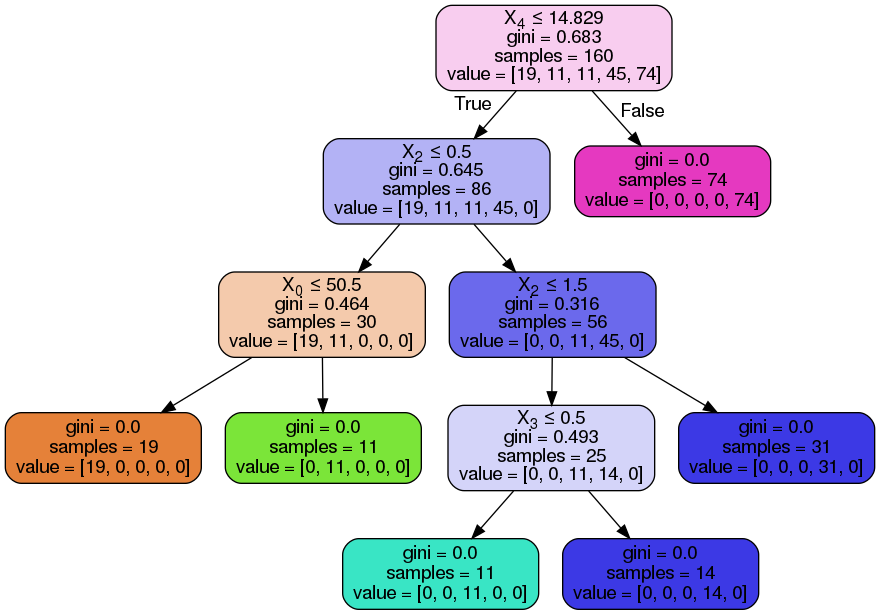

In [42]:
Image(graph.create_png())